In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [75]:
# Read data 
data = np.load('data/np_data.npy')
data.shape

(15315, 3200)

In [76]:
# select source signals 
num_shots = 3
receivers_per_line = 638 
num_lines = 8 

source_idx = np.array([(receivers_per_line *num_lines)*i + i for i in range(num_shots +1)])
source_idx = np.concatenate((np.array([-1]),source_idx))
source_idx


array([   -1,     0,  5105, 10210, 15315])

In [77]:
# get time stamps 
def get_time(data,delta_t=2*1e-3):
    return np.arange(data.shape[1])*delta_t

In [78]:
# this returns the signals from given shot and line 
def get_receivers_data(shot_no,line_no,data=data):
    signal = data[source_idx[shot_no]+1:source_idx[shot_no +1]] # select the data from given shot
    signal = signal.reshape(receivers_per_line,num_lines,-1)    # (receiver, line, time)
    return signal[:,line_no-1,:]                                # (receiver,time )

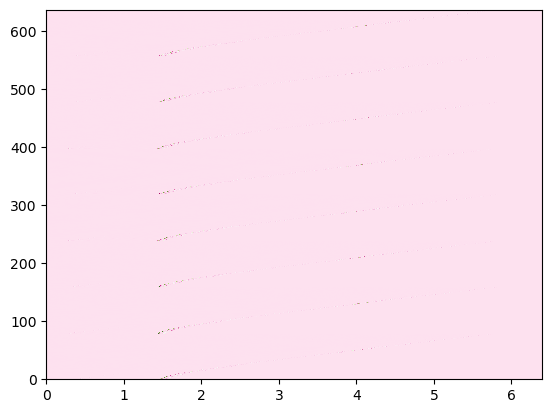

In [94]:
# shot 1 line 1 
signals = get_receivers_data(1,0) # signal from all the receivers from line 1 
signals = signals/1000             # scale the signal (by dividing 100)

x = np.arange(data.shape[1])*2e-3
y = np.arange(receivers_per_line)
X,Y = np.meshgrid(x,y)

import matplotlib.colors as mcolors
#cmap = mcolors.LinearSegmentedColormap.from_list('blue_red', ['blue', 'red'])
cmap = plt.colormaps['PiYG']
plt.pcolormesh(X,Y,signals, cmap=cmap)